In [1]:
#installation pps
!pip install -U ppscore

In [2]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ppscore as pps

In [3]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [4]:
#eξερεύνηση συνόλου δεδομένων
dataset

Name  \
0                                       memtest.exe   
1                                           ose.exe   
2                                         setup.exe   
3                                          DW20.EXE   
4                                      dwtrig20.exe   
...                                             ...   
138042  VirusShare_8e292b418568d6e7b87f2a32aee7074b   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138044  VirusShare_8d088a51b7d225c9f5d11d239791ec3f   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   
138046  VirusShare_d7648eae45f09b3adb75127f43be6d11   

                                     md5  Machine  SizeOfOptionalHeader  \
0       631ea355665f28d4707448e442fbf5b8      332                   224   
1       9d10f99a6712e28f8acd5641e3a7ea6b      332                   224   
2       4d92f518527353c0db88a70fddcfd390      332                   224   
3       a41e524f8d45f0074fd07805ff0c9b12      332                   224   
4       c87e561258f2f8650cef999bf643a731      332                   224   
...                                  ...      ...                   ...   
138042  8e292b418568d6e7b87f2a32aee7074b      332                   224   
138043  260d9e2258aed4c8a3bbd703ec895822      332                   224   
138044  8d088a51b7d225c9f5d11d239791ec3f      332                   224   
138045  4286dccf67ca220fe67635388229a9f3      332                   224   
138046  d7648eae45f09b3adb75127f43be6d11      332                   224   

        Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   258                   9                   0      361984   
1                  3330                   9                   0      130560   
2                  3330                   9                   0      517120   
3                   258                   9                   0      585728   
4                   258                   9                   0      294912   
...                 ...                 ...                 ...         ...   
138042              258                  11                   0      205824   
138043            33167                   2                  25       37888   
138044              258                  10                   0      118272   
138045            33166                   2                  25       49152   
138046              258                  11                   0      111616   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                      115712                        0  ...            4   
1                       19968                        0  ...            2   
2                      621568                        0  ...           11   
3                      369152                        0  ...           10   
4                      247296                        0  ...            2   
...                       ...                      ...  ...          ...   
138042                 223744                        0  ...            7   
138043                 185344                        0  ...           26   
138044                 380416                        0  ...           22   
138045                  16896                        0  ...           10   
138046                 468480                        0  ...            4   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                   3.262823             2.568844             3.537939   
1                   4.250461             3.420744             5.080177   
2                   4.426324             2.846449             5.271813   
3                   4.364291             2.669314             6.400720   
4                   4.306100             3.421598             5.190603   
...                      ...                  ...                  ...   
138042              4.122736             1.370260             7.677091   
138043              3.377663   

In [5]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

Machine  SizeOfOptionalHeader  Characteristics  \
count  138047.000000         138047.000000    138047.000000   
mean     4259.069274            225.845632      4444.145994   
std     10880.347245              5.121399      8186.782524   
min       332.000000            224.000000         2.000000   
25%       332.000000            224.000000       258.000000   
50%       332.000000            224.000000       258.000000   
75%       332.000000            224.000000      8226.000000   
max     34404.000000            352.000000     49551.000000   

       MajorLinkerVersion  MinorLinkerVersion    SizeOfCode  \
count       138047.000000       138047.000000  1.380470e+05   
mean             8.619774            3.819286  2.425956e+05   
std              4.088757           11.862675  5.754485e+06   
min              0.000000            0.000000  0.000000e+00   
25%              8.000000            0.000000  3.020800e+04   
50%              9.000000            0.000000  1.136640e+05   
75%             10.000000            0.000000  1.203200e+05   
max            255.000000          255.000000  1.818587e+09   

       SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
count           1.380470e+05             1.380470e+05         1.380470e+05   
mean            4.504867e+05             1.009525e+05         1.719561e+05   
std             2.101599e+07             1.635288e+07         3.430553e+06   
min             0.000000e+00             0.000000e+00         0.000000e+00   
25%             2.457600e+04             0.000000e+00         1.272100e+04   
50%             2.631680e+05             0.000000e+00         5.288300e+04   
75%             3.850240e+05             0.000000e+00         6.157800e+04   
max             4.294966e+09             4.294941e+09         1.074484e+09   

         BaseOfCode  ...    ResourcesNb  ResourcesMeanEntropy  \
count  1.380470e+05  ...  138047.000000         138047.000000   
mean   5.779845e+04  ...      22.050700              4.000127   
std    5.527658e+06  ...     136.494244              1.112981   
min    0.000000e+00  ...       0.000000              0.000000   
25%    4.096000e+03  ...       5.000000              3.458505   
50%    4.096000e+03  ...       6.000000              3.729824   
75%    4.096000e+03  ...      13.000000              4.233051   
max    2.028711e+09  ...    7694.000000              7.999723   

       ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
count        138047.000000        138047.000000       1.380470e+05   
mean              2.434541             5.521610       5.545093e+04   
std               0.815577             1.597403       7.799163e+06   
min               0.000000             0.000000       0.000000e+00   
25%               2.178748             4.828706       9.560000e+02   
50%               2.458492             5.317552       2.708154e+03   
75%               2.696833             6.502239       6.558429e+03   
max               7.999723             8.000000       2.415919e+09   

       ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
count      1.380470e+05      1.380470e+05           1.380470e+05   
mean       1.818082e+04      2.465903e+05           4.656750e+05   
std        6.502369e+06      2.124860e+07           2.608987e+07   
min        0.000000e+00      0.000000e+00           0.000000e+00   
25%        4.800000e+01      2.216000e+03           0.000000e+00   
50%        4.800000e+01      9.640000e+03           7.200000e+01   
75%        1.320000e+02      2.378000e+04           7.200000e+01   
max        2.415919e+09      4.294903e+09           4.294967e+09   

       VersionInformationSize     legitimate  
count           138047.000000  138047.000000  
mean                12.363115       0.299340  
std                  6.798878       0.457971  
min                  0.000000       0.000000  
25%                 13.000000       0.000000  
50%                 15.000000       0.000000  
75%            

In [6]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

Name  \
0  VirusShare_fb3401245596615e96577d37fe6b23c0   
1           api-ms-win-core-profile-l1-1-0.dll   
2  VirusShare_d7bb6a66112f9cf1047c3a6bf7623b52   
3  VirusShare_ebd9b4e145e9dfc53ab62b362979bf77   
4  VirusShare_71562e85d07de91b307e38d81302090c   

                                md5  Machine  SizeOfOptionalHeader  \
0  fb3401245596615e96577d37fe6b23c0      332                   224   
1  d606e72653f31c2df53d9ee86a0f50b6    34404                   240   
2  d7bb6a66112f9cf1047c3a6bf7623b52      332                   224   
3  ebd9b4e145e9dfc53ab62b362979bf77      332                   224   
4  71562e85d07de91b307e38d81302090c      332                   224   

   Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                  10                   0      120320   
1             8226                   9                   0         512   
2              258                  10                   0      117760   
3              270                   2                  50       64512   
4              258                  10                   0      117760   

   SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                 385024                        0  ...            6   
1                   1536                        0  ...            1   
2                 392192                        0  ...            5   
3                  32768                    84992  ...            1   
4                 389120                        0  ...            5   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0              3.671986             2.458492             5.317552   
1              3.565808             3.565808             3.565808   
2              3.425849             2.458492             4.035538   
3              3.477140             3.477140             3.477140   
4              3.312034             2.674420             3.764385   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0             2739.5                48              9640   
1              908.0               908               908   
2             3146.4                48              9640   
3              888.0               888               888   
4             2532.0                48              7336   

   LoadConfigurationSize  VersionInformationSize  legitimate  
0                     72                      15           0  
1                      0                      16           1  
2                     72                      15           0  
3                      0                      16           0  
4                     72                      15           0  

[5 rows x 57 columns]

In [7]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

([<matplotlib.patches.Wedge at 0x7a34bdcc5ea0>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Malware'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Legitimate')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

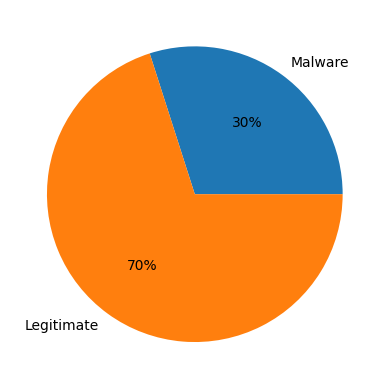

In [8]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

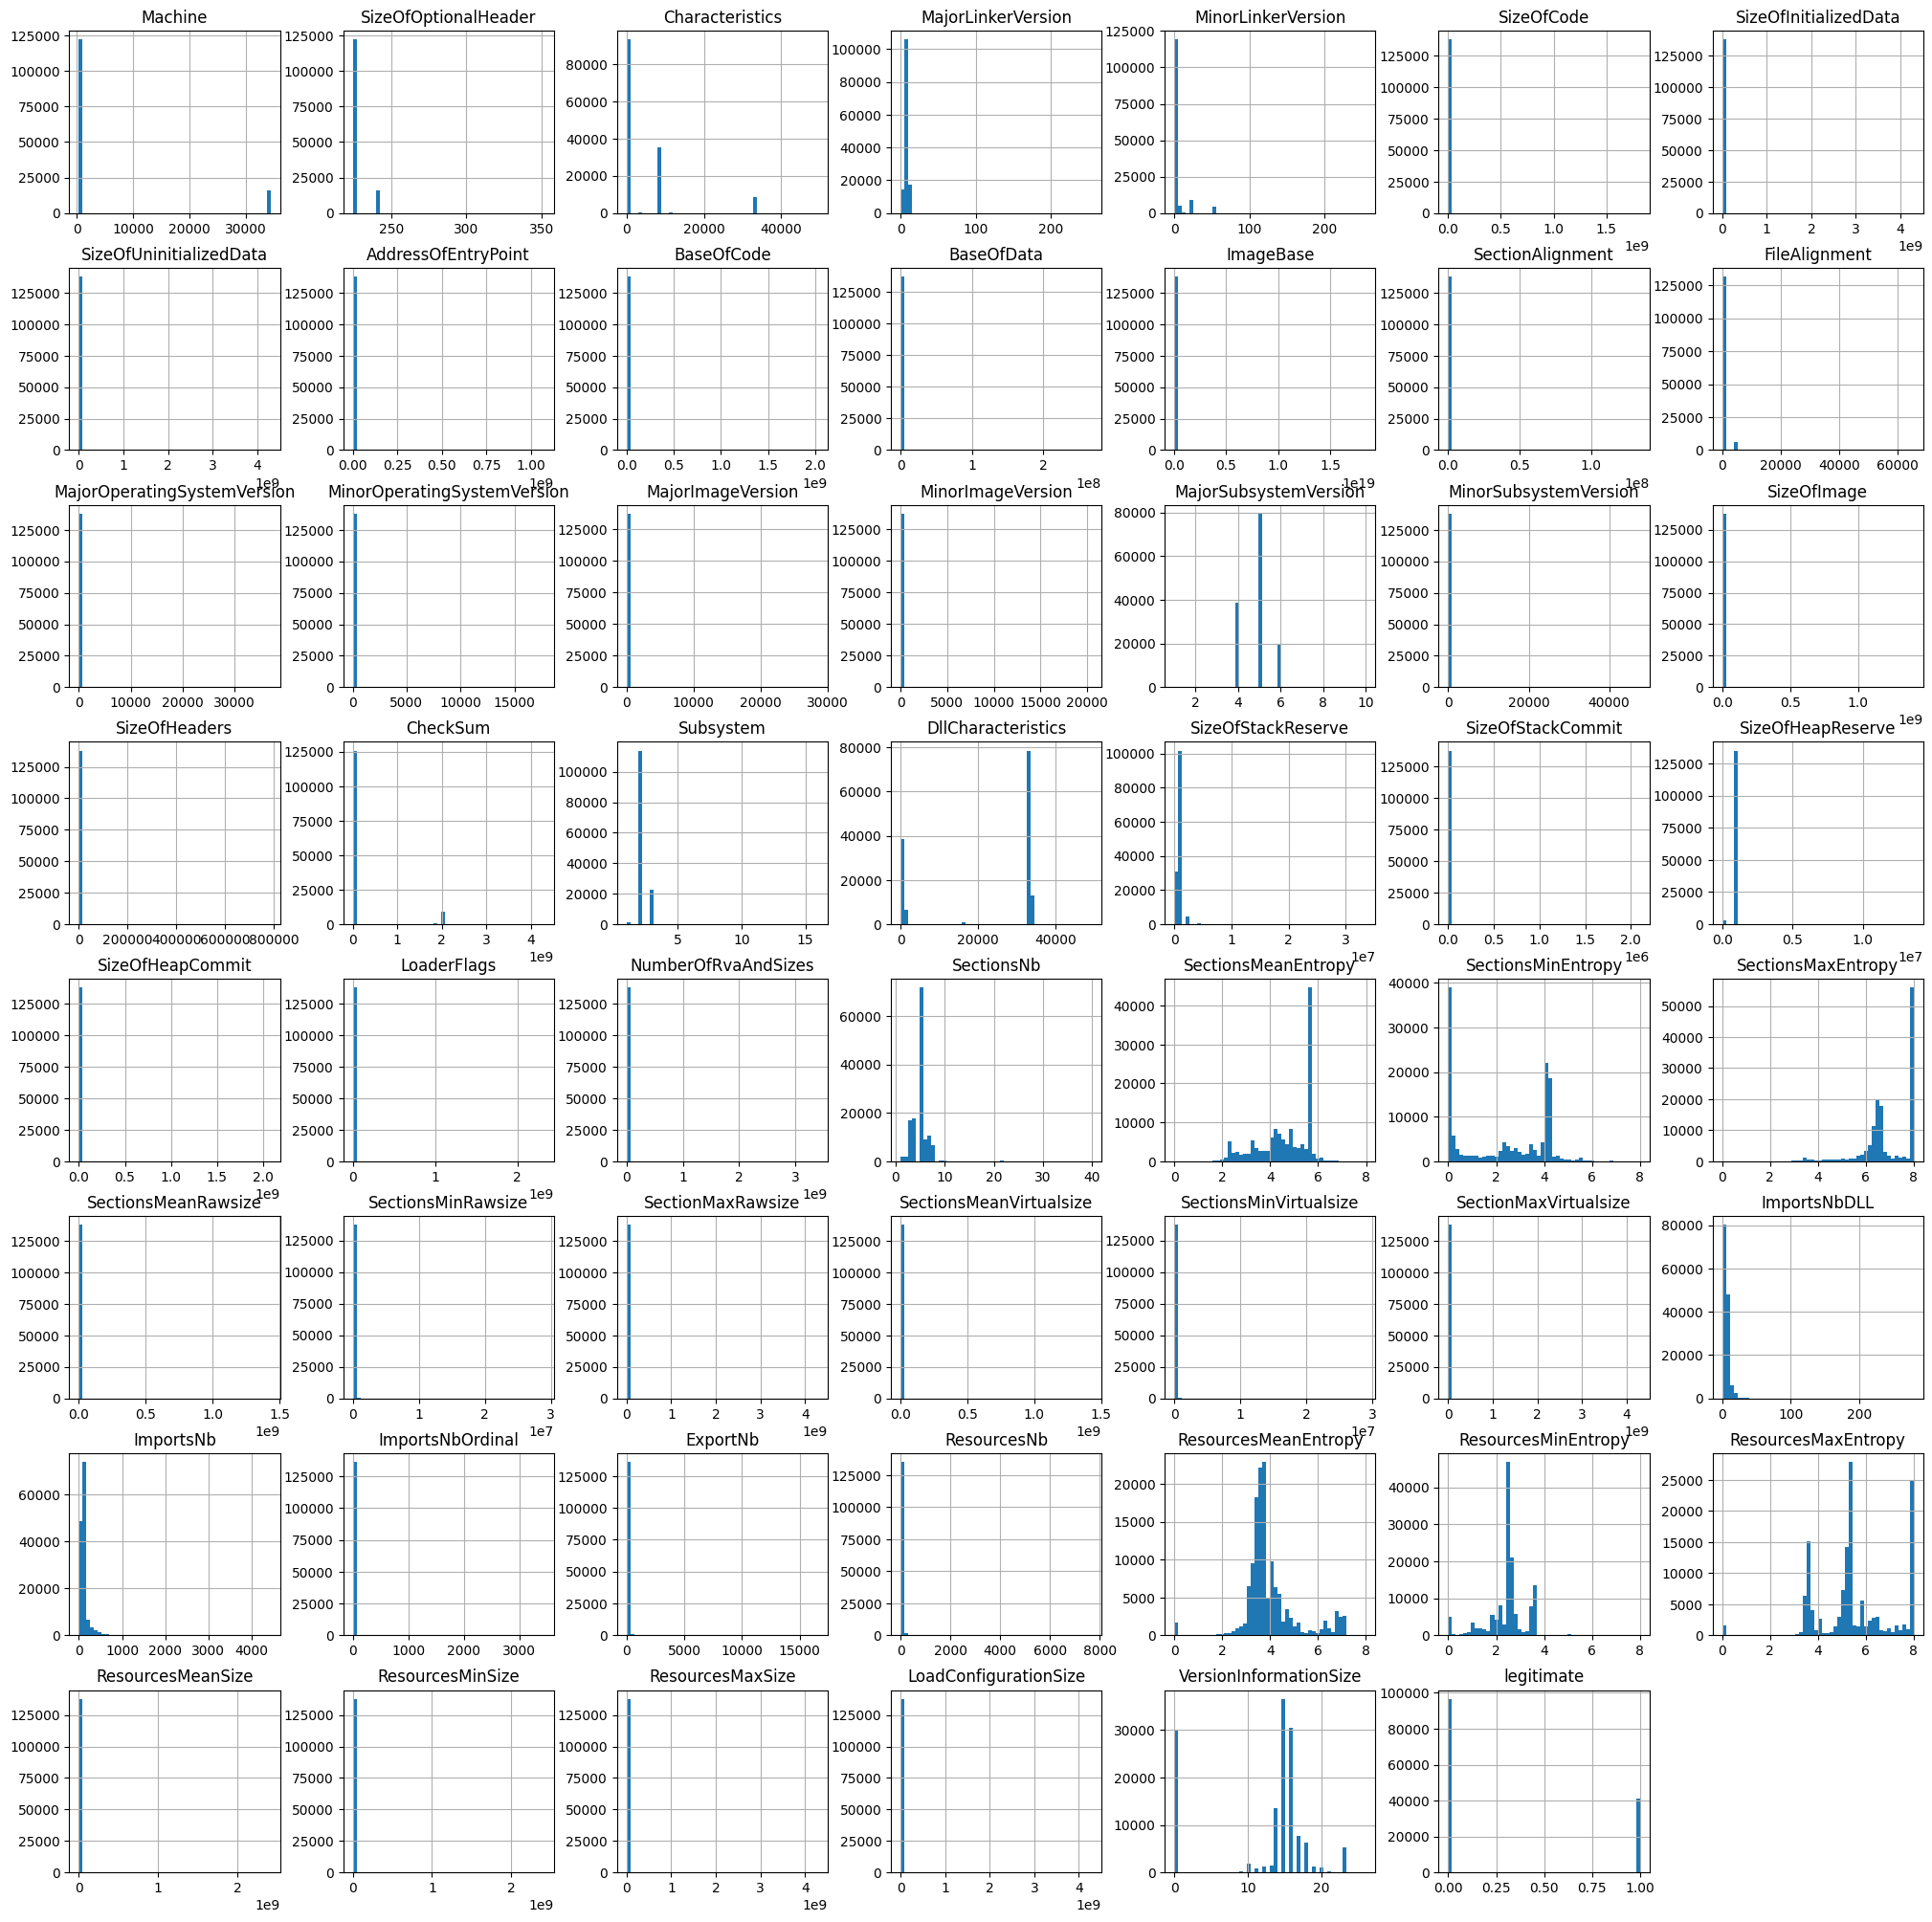

In [9]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

<ipython-input-10-88fdfae63182>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


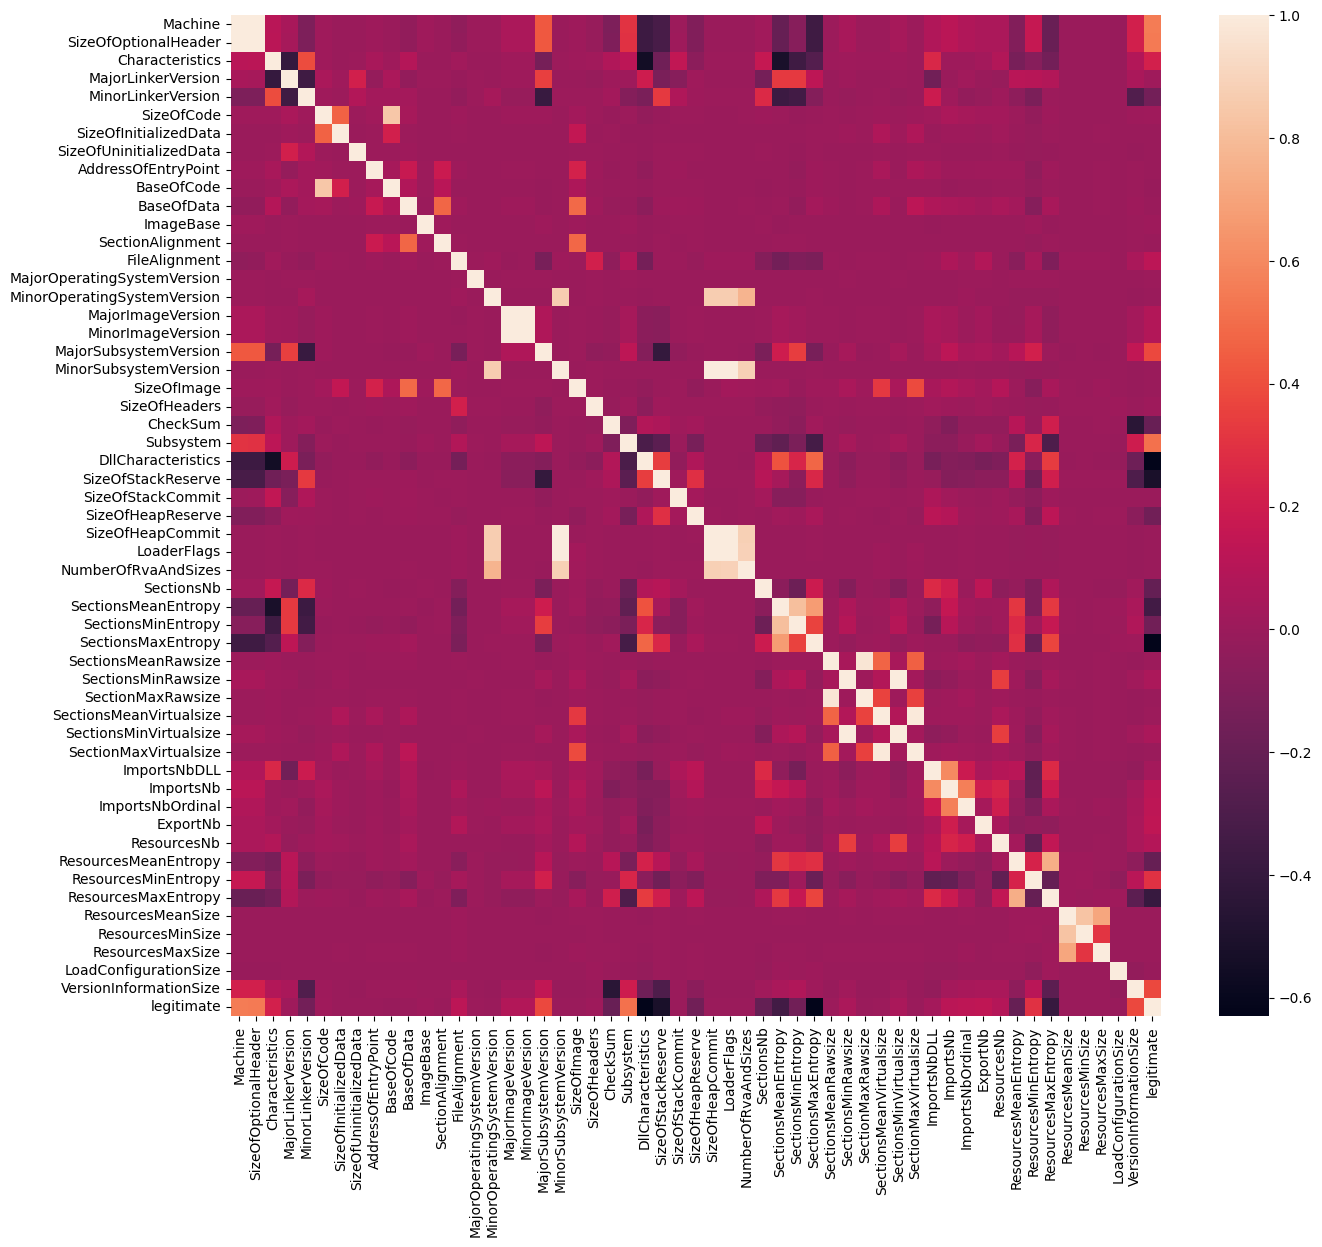

In [10]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

In [11]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [12]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [13]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

Name  \
0       VirusShare_fb3401245596615e96577d37fe6b23c0   
1                api-ms-win-core-profile-l1-1-0.dll   
2       VirusShare_d7bb6a66112f9cf1047c3a6bf7623b52   
3       VirusShare_ebd9b4e145e9dfc53ab62b362979bf77   
4       VirusShare_71562e85d07de91b307e38d81302090c   
...                                             ...   
138042  VirusShare_9235f747ed48462a6fc17dd90e012de4   
138043  VirusShare_b72396298ee8ad660ac50e0ba68f69fb   
138044  VirusShare_d33dd567301e31dcbaba9434b0ed964b   
138045                                 ativvaxx.dll   
138046  VirusShare_7cbd24e36aad429dca29328521cac7a3   

                                     md5 Machine SizeOfOptionalHeader  \
0       fb3401245596615e96577d37fe6b23c0     332                  224   
1       d606e72653f31c2df53d9ee86a0f50b6   34404                  240   
2       d7bb6a66112f9cf1047c3a6bf7623b52     332                  224   
3       ebd9b4e145e9dfc53ab62b362979bf77     332                  224   
4       71562e85d07de91b307e38d81302090c     332                  224   
...                                  ...     ...                  ...   
138042  9235f747ed48462a6fc17dd90e012de4     332                  224   
138043  b72396298ee8ad660ac50e0ba68f69fb     332                  224   
138044  d33dd567301e31dcbaba9434b0ed964b     332                  224   
138045  e06b80547a52b393600195ecfa30195b     332                  224   
138046  7cbd24e36aad429dca29328521cac7a3     332                  224   

       Characteristics MajorLinkerVersion MinorLinkerVersion SizeOfCode  \
0                  258                 10                  0     120320   
1                 8226                  9                  0        512   
2                  258                 10                  0     117760   
3                  270                  2                 50      64512   
4                  258                 10                  0     117760   
...                ...                ...                ...        ...   
138042             271                  6                  0      24064   
138043             259                  9                  0      25600   
138044             258                  9                  0     105984   
138045            8462                  7                 10     429312   
138046             258                 11                  0     110080   

       SizeOfInitializedData SizeOfUninitializedData  ... ExportNb  \
0                     385024                       0  ...        0   
1                       1536                       0  ...        2   
2                     392192                       0  ...        0   
3                      32768                   84992  ...        0   
4                     389120                       0  ...        0   
...                      ...                     ...  ...      ...   
138042                164864                    1024  ...        0   
138043               4094976                   16896  ...        0   
138044                598528                       0  ...        0   
138045                 86688                       0  ...        1   
138046                387072                       0  ...        0   

       ResourcesNb ResourcesMeanEntropy ResourcesMinEntropy  \
0                6             3.671986            2.458492   
1                1             3.565808            3.565808   
2                5             3.425849            2.458492   
3                1              3.47714             3.47714   
4                5             3.312034             2.67442   
...            ...                  ...                 ...   
138042           6             3.195909            1.971335   
138043          27             3.795096            2.731767   
138044           7             4.440821            2.623078   
138045           1              3.50929             3.50929   
138046          10             3.915669            0.960066   

       Res

In [14]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [15]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [16]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [17]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [1 1 1 ... 1 1 1]


In [18]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [19]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 0    94380
1    36766
Name: legitimate, dtype: int64


In [20]:
# Εκτύπωση καθαρού συνόλου
clean_data

Name     md5  Machine  SizeOfOptionalHeader  Characteristics  \
0       100226  136070        0                     0               11   
1       101961  113880        2                     2               67   
2        85002  115110        0                     0               11   
3        95416  128743        0                     0               17   
4        31875   45480        0                     0               11   
...        ...     ...      ...                   ...              ...   
138042   46632   65676        0                     0               18   
138043   65614   90515        0                     0               12   
138044   82353  111696        0                     0               11   
138045  102072  121450        0                     0               73   
138046   36819   52382        0                     0               11   

        MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                       10                   0         309   
1                        9                   0           3   
2                       10                   0         304   
3                        2                  36         189   
4                       10                   0         304   
...                    ...                 ...         ...   
138042                   6                   0          97   
138043                   9                   0         102   
138044                   9                   0         281   
138045                   7                  10         924   
138046                  11                   0         289   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                         819                        0  ...            6   
1                          10                        0  ...            1   
2                         831                        0  ...            5   
3                         100                       81  ...            1   
4                         825                        0  ...            5   
...                       ...                      ...  ...          ...   
138042                    377                        4  ...            6   
138043                   2713                       36  ...           27   
138044                   1184                        0  ...            7   
138045                    222                        0  ...            1   
138046                    823                        0  ...           10   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                      24431                 2649                16569   
1                      21748                15699                 9972   
2                      13150                 2649                13090   
3                      15485                 8578                 2532   
4                       9650                 3468                12671   
...                      ...                  ...                  ...   
138042                  7349                 1561                16163   
138043                 26829                 3712                18291   
138044                 36967                 3206                22538   
138045                 16940                10079                 3927   
138046                 28406                  343                19129   

        ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0                    9163                44              2027   
1                    4142               658               278   
2                    9699                44              2027   
3                    4042               650               268   
4                    8856                44              1824   
...                   ...               ...               ...   
138042               1206                32               317   
138043               5717               145           

In [21]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [22]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.42586187,  0.826123  , -0.34947856, ...,  1.98256696,
         0.48449067, -1.70525824],
       [ 1.2769341 , -0.17407446, -0.34947856, ..., -0.48085677,
         1.75082906,  0.7485827 ],
       [-1.29059729, -1.43776916, -0.34947856, ..., -0.06027223,
        -0.78184772,  0.52550625],
       ...,
       [-1.54192845, -0.01489454, -0.34947856, ..., -1.16686514,
        -0.78184772,  0.97165915],
       [-1.29062569, -1.43779528, -0.34947856, ..., -0.06027223,
         0.48449067,  0.3024298 ],
       [-0.12318125,  0.17082842, -0.34947856, ...,  0.6772363 ,
         0.48449067,  0.07935335]])

In [23]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [24]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18959
           1       1.00      1.00      1.00      7271

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

RandomForest - Πίνακας Συγχυσης:
 [[18952     7]
 [    0  7271]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18959
           1       1.00      1.00      1.00      7271

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

GradientBoosting - Πίνακας Συγχυσης:
 [[18958     1]
 [    0  7271]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [25]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy  Recall  Precision  F1 Score
RandomForest      0.999733     1.0   0.999038  0.999519
GradientBoosting  0.999962     1.0   0.999862  0.999931
AdaBoost          1.000000     1.0   1.000000  1.000000


In [26]:
#αφαίρεση κατηγορικών μεταβλητών
data_pps = clean_data.drop(['Name', 'md5'], axis=1)
data_pps
#υπολογισμός πινακα PPS μεταξύ όλων των στηλών
pps.matrix(data_pps)

x                       y   ppscore            case  \
0        Machine                 Machine  1.000000  predict_itself   
1        Machine    SizeOfOptionalHeader  0.992387      regression   
2        Machine         Characteristics  0.000000      regression   
3        Machine      MajorLinkerVersion  0.000000      regression   
4        Machine      MinorLinkerVersion  0.000000      regression   
...          ...                     ...       ...             ...   
3020  legitimate        ResourcesMinSize  0.116575      regression   
3021  legitimate        ResourcesMaxSize  0.000440      regression   
3022  legitimate   LoadConfigurationSize  0.000000      regression   
3023  legitimate  VersionInformationSize  0.000000      regression   
3024  legitimate              legitimate  1.000000  predict_itself   

      is_valid_score               metric  baseline_score  model_score  \
0               True                 None          0.0000     1.000000   
1               True  mean absolute error          0.2100     0.001599   
2               True  mean absolute error         21.5608    23.988210   
3               True  mean absolute error          1.7050     1.860116   
4               True  mean absolute error          3.2614     5.521085   
...              ...                  ...             ...          ...   
3020            True  mean absolute error        109.7596    96.964382   
3021            True  mean absolute error       1100.3688  1099.884549   
3022            True  mean absolute error          0.4882     0.533603   
3023            True  mean absolute error          3.0438     3.130218   
3024            True                 None          0.0000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3     DecisionTreeRegressor()  
4     DecisionTreeRegressor()  
...                       ...  
3020  DecisionTreeRegressor()  
3021  DecisionTreeRegressor()  
3022  DecisionTreeRegressor()  
3023  DecisionTreeRegressor()  
3024                     None  

[3025 rows x 9 columns]